## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
from joblib import dump, load

# mnist = fetch_openml('mnist_784')
# dump(mnist, 'mnist_784.joblib')

In [2]:
mnist = load('mnist_784.joblib')
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import numpy as np

X = np.array(X)
y = np.array(y)

(-0.5, 27.5, 27.5, -0.5)

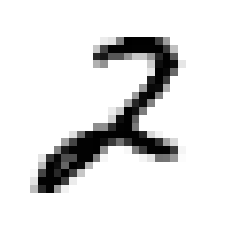

In [6]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36001]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [7]:
y[36001]

'2'

In [8]:
# Splitting into train & test set
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Creating a '2' detector

In [9]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [10]:
y_train

array([9, 7, 3, ..., 9, 8, 6], dtype=int8)

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train_2)

LogisticRegression(penalty='l1', solver='saga', tol=0.1)

In [12]:
clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

a = cross_val_score(clf, X_train, y_train_2, cv=3, scoring="accuracy")
a.mean()

0.9788

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train, y_train_2, cv=3)
y_train_pred

array([False, False,  True, ..., False, False, False])

## Calculating confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

array([[53679,   363],
       [  908,  5050]], dtype=int64)

In [16]:
confusion_matrix(y_train_2, y_train_2) # This is the confusion matrix for perfect predictions

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision and Recall

In [17]:
from sklearn.metrics import precision_score, recall_score

In [18]:
precision_score(y_train_2, y_train_pred) # This is my precision score

0.9329392203953445

In [19]:
recall_score(y_train_2, y_train_pred) # This is my recall score

0.8475998657267539

## F1 - Score

In [20]:
from sklearn.metrics import f1_score

In [21]:
f1_score(y_train_2, y_train_pred)

0.8882244305689913

## Precision Recall Curve

In [22]:
from sklearn.metrics import precision_recall_curve

In [23]:
y_scores = cross_val_predict(clf, X_train, y_train_2, cv=3, method="decision_function")

In [24]:
y_scores

array([ -6.91211558, -10.4934115 ,   2.47430312, ..., -10.31376372,
        -3.24446701,  -8.18472036])

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [26]:
precisions

array([0.10079001, 0.1007748 , 0.10077651, ..., 1.        , 1.        ,
       1.        ])

In [27]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [28]:
thresholds

array([-18.17938985, -18.17772576, -18.164561  , ...,  14.15518169,
        15.95769468,  16.17362716])

## Plotting the Precision Recall Curve

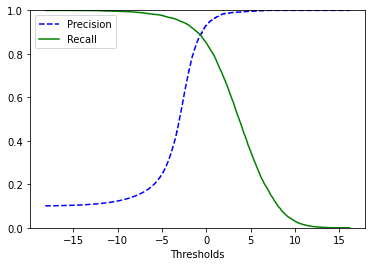

In [29]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

## Testing the model on test data

In [34]:
y_pred = clf.predict(X_test)

# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y_test_2 == y_pred), "out of", y_test_2.shape[0])

Correctly predicted labels: 9797 out of 10000


## Saving the model

In [35]:
dump(clf, 'MNIST.joblib')

['MNIST.joblib']